In [2]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [3]:
# importing the dataset
df = pd.read_csv('census_income.csv')
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
# let's see the 1st ten data points
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# checking the data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#Statistical description of the data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.describe(include=object).T

,count,unique,top,freq
Workclass,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Marital_status,32560,7,Married-civ-spouse,14976
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native_country,32560,42,United-States,29169
Income,32560,2,<=50K,24719


In [10]:
#Checking the shape of the data
df.shape

(32560, 15)

In [11]:
#Checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values, our data is complete

In [13]:
# Let's define a function we will use for plotting charts
def bar_chart(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


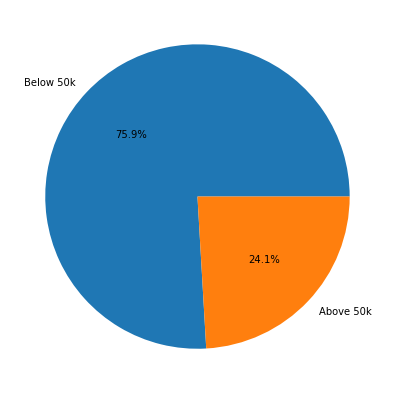

In [12]:
# let's take a look at the disrtibution of the target variable
fig = plt.figure(figsize =(10, 7))
plt.pie(df['Income'].value_counts(), labels = ['Below 50k', 'Above 50k'], autopct='%1.1f%%')
print(df['Income'].value_counts())
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

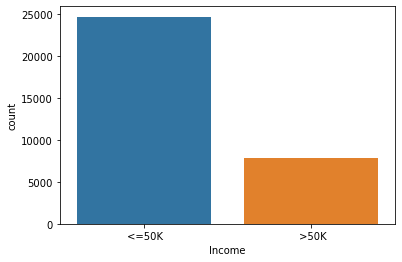

In [14]:
sns.countplot(df['Income'])

We can see that majority of the people had incomes below 50k 

Now we will take a look a the features to examine their influence on the income of the individuals

38.581633906633904


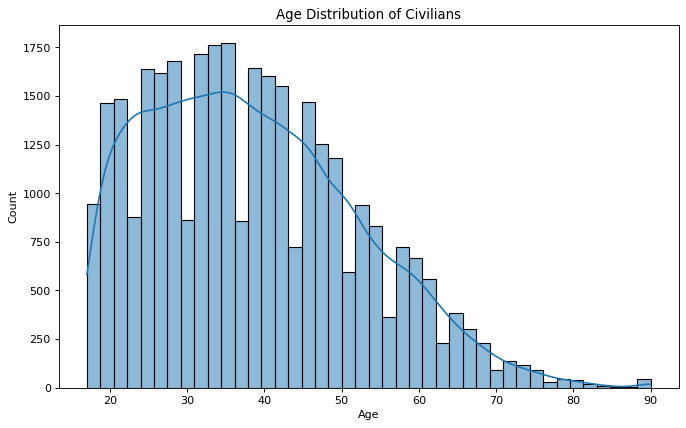

In [15]:
# let's take a look at age
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('Age Distribution of Civilians')
print(df['Age'].mean())

We notice most of the civilians earning income are  between 17 to 60 with a mean of  38.5 which is the normal age range of most workers since most persons tend to retire after 60.

Text(0.5, 1.0, 'Income by Age')

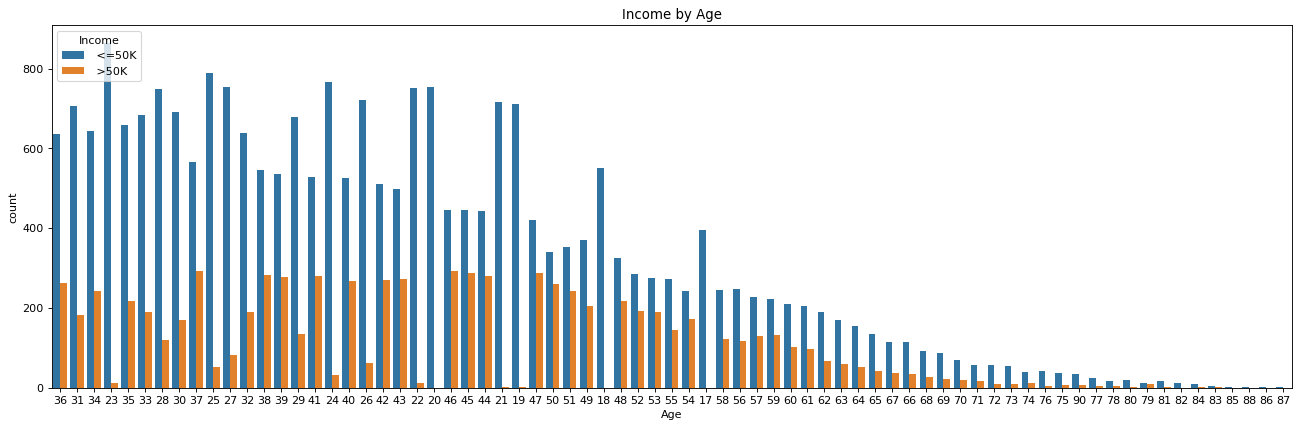

In [23]:
# Now let's check the effect of age on Attrtion
plt.figure(figsize=(20,6), dpi=80)
sns.countplot(data=df, x='Age', hue='Income', order = df['Age'].value_counts().index).set_title('Income by Age')

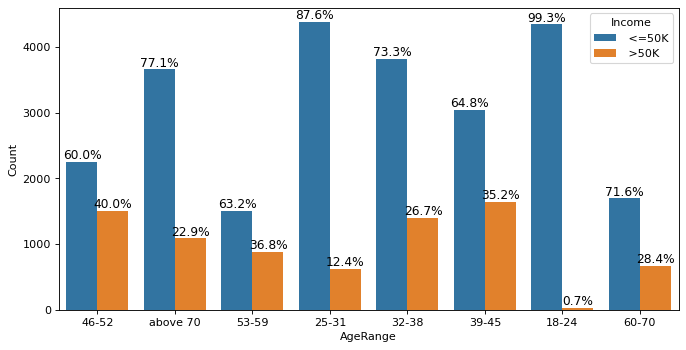

In [19]:
# We'll gorup the workers into various age ranges to get more insights
agerange = []
for age in df["Age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    elif age >= 59 and age < 70:
        agerange.append("60-70")
    else:
        agerange.append("above 70")

df1 = df.copy()       
df1["AgeRange"] = agerange
plt.figure(figsize=(10,5), dpi=80)
age_range = sns.countplot(x="AgeRange", hue="Income", data=df1)
age_range.set(xlabel='AgeRange', ylabel='Count')

bar_chart(age_range)
plt.show()

We can see that at the ages of 17 and 18 no citizen has an income above 50k which is normal since people in their early careers always earn less. As the ages increases we notice an increase in the percentage of citizens with salaries above 50k, we notice the highest percentage of citizens with income above 50 between the ages of 39 to 52 and then the rate drops again as the citizens get close to 60yrs pf age

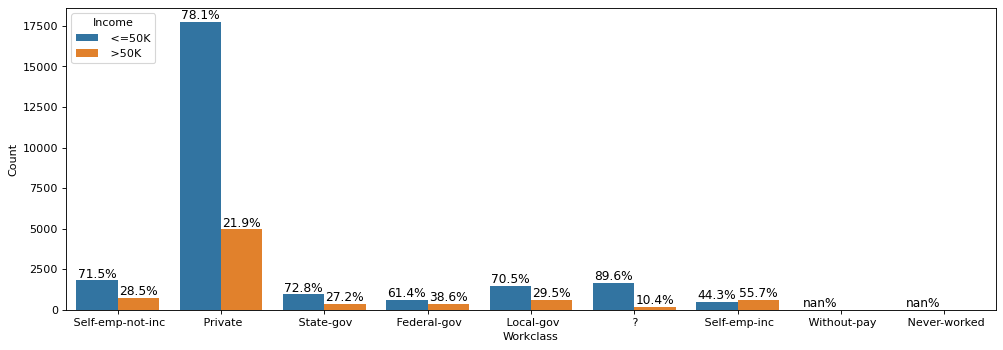

In [28]:
# Now let's take a look at Work Class
plt.figure(figsize=(15,5), dpi=80)
wkclass = sns.countplot(x="Workclass", hue="Income", data=df)
wkclass.set(xlabel='Workclass', ylabel='Count')

bar_chart(wkclass)
plt.show()

We see a majority of citizens in the private sector class. The private class also has more people with income levels below 50k, 
The Self-emp-inc class has the most percentage of citizens with income levels above 50k, followed by the Federal-gov and 
State-gov classes

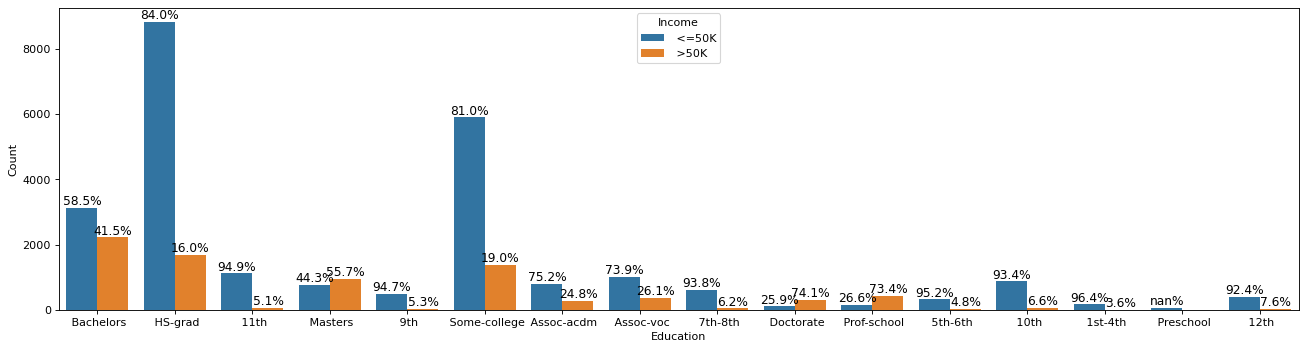

In [35]:
# Now lets see if Educational levels influences Income
plt.figure(figsize=(20,5), dpi=80)
educ = sns.countplot(x="Education", hue="Income", data=df)
educ.set(xlabel='Education', ylabel='Count')

bar_chart(educ)
plt.show()

We can clearly see that as the education level increases the income increase. We can see a constant rise in the percentage of income earners aboove 50k as the education level increases. The percentages of income earners above 50k within the levels of Masters, Doctorate and Prof-school are higher than income earners below 50k. This means education ha a great impact on income

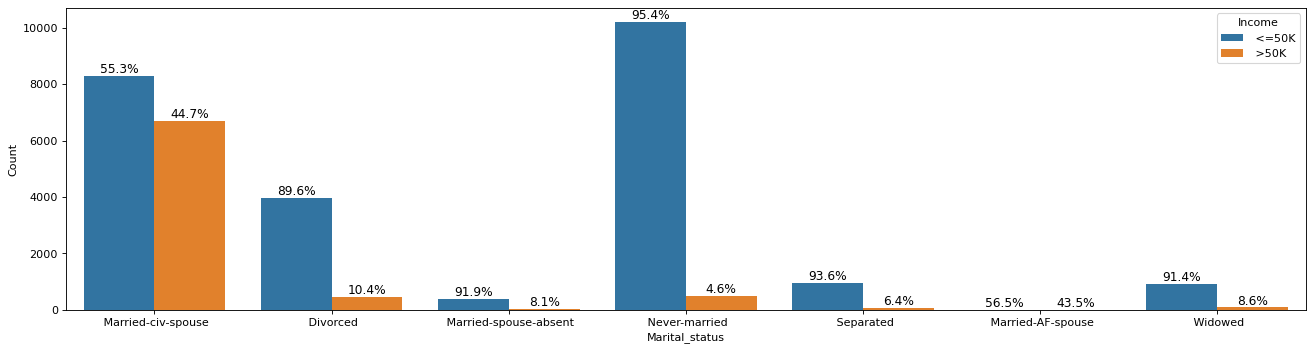

In [50]:
# Let's take a look at Marital Status
plt.figure(figsize=(20,5), dpi=80)
marital = sns.countplot(x="Marital_status", hue="Income", data=df)
marital.set(xlabel='Marital_status', ylabel='Count')

bar_chart(marital)
plt.show()

Married persons with spouse tend to earn incomes above 50k more than all the other categories

Never married persons have the least percentage of income earners above 50k. This is reasonable since most never-married persons are young and our age column already proved to us that most young persons have incomes below 50k.

We also see Married-AF-spouse persons with a high percentage of persons with incomes above 50k though they constitute a very small proportion of the dataset.
From the data we can conclude that Married persons earn more

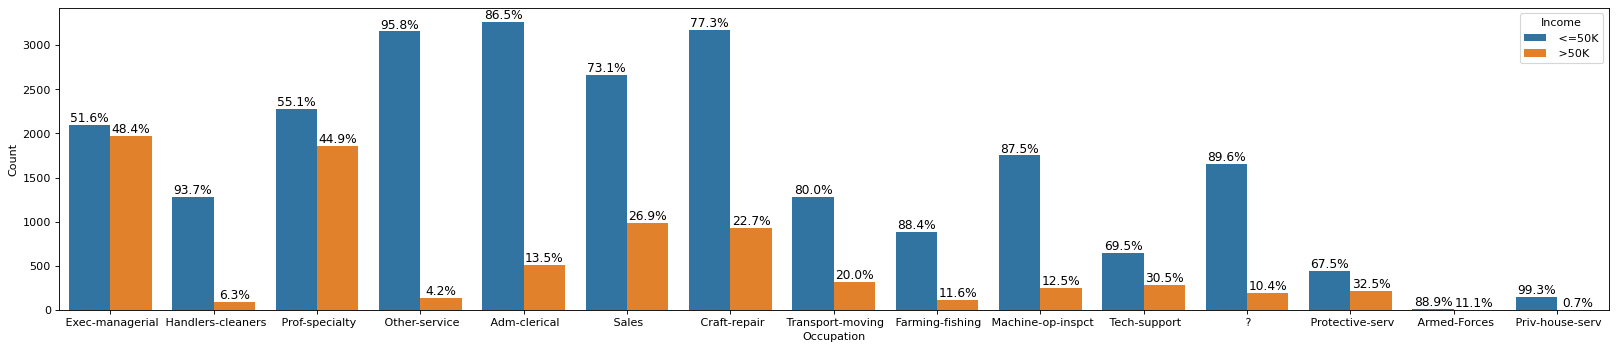

In [52]:
# Now let's look at Occupation
plt.figure(figsize=(25,5), dpi=80)
occupation = sns.countplot(x="Occupation", hue="Income", data=df)
occupation.set(xlabel='Occupation', ylabel='Count')

bar_chart(occupation)
plt.show()

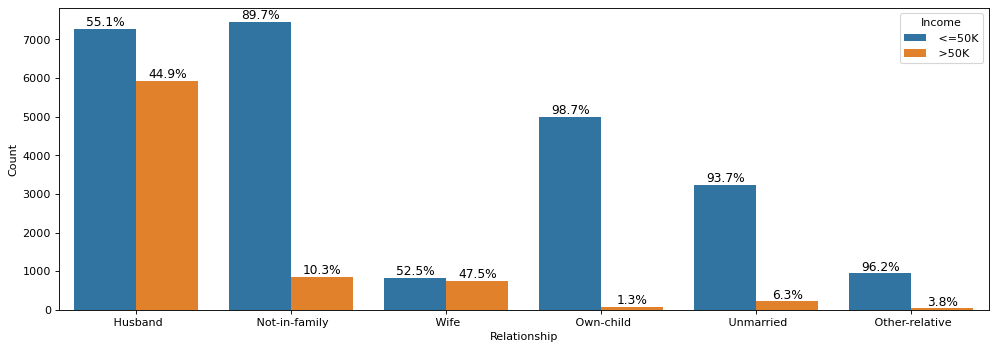

In [54]:
# Now lets see if relationship status affects income
plt.figure(figsize=(15,5), dpi=80)
relation = sns.countplot(x="Relationship", hue="Income", data=df)
relation.set(xlabel='Relationship', ylabel='Count')

bar_chart(relation)
plt.show()

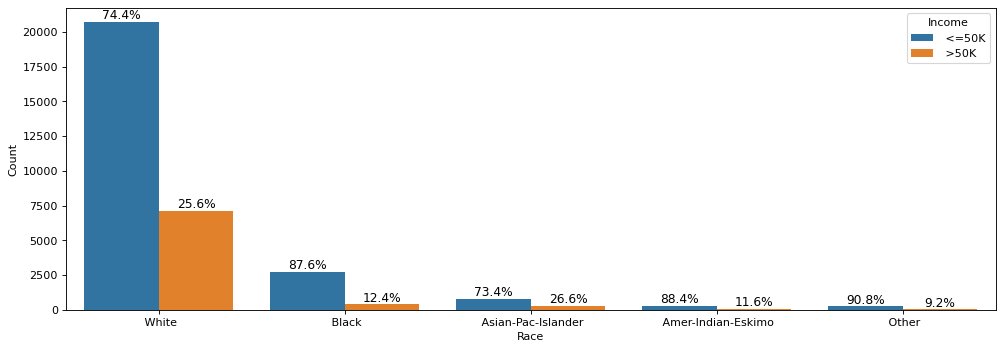

In [55]:
# Let's take a look at income by Race
plt.figure(figsize=(15,5), dpi=80)
race = sns.countplot(x="Race", hue="Income", data=df)
race.set(xlabel='Race', ylabel='Count')

bar_chart(race)
plt.show()

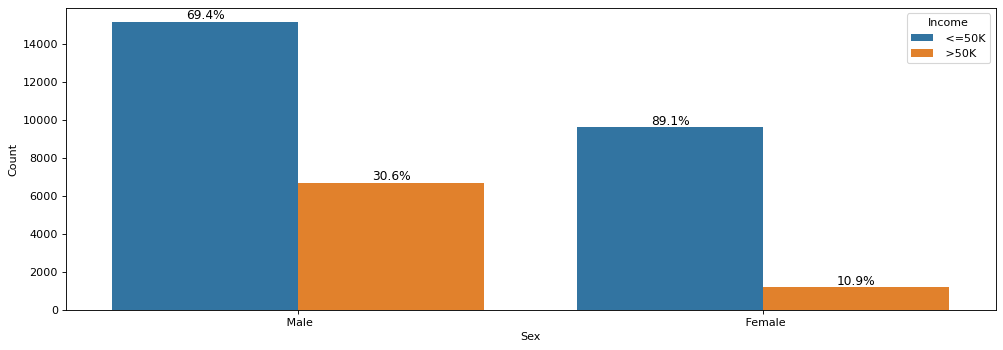

In [56]:
# Let's take a look at income by Sex
plt.figure(figsize=(15,5), dpi=80)
sex = sns.countplot(x="Sex", hue="Income", data=df)
sex.set(xlabel='Sex', ylabel='Count')

bar_chart(sex)
plt.show()

In [4]:
# change the Attrition column to numeric
df['Income'] = df['Income'].factorize(['<50k','>=50k'])[0]
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


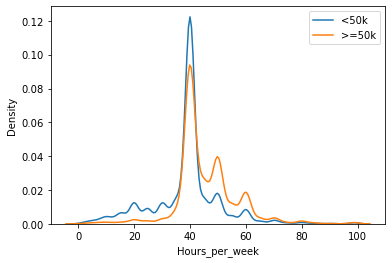

In [78]:
# Let's take a look at income by Work Hours
income_a = df[df['Income']== 0]
income_b = df[df['Income']== 1]
sns.kdeplot(income_a.Hours_per_week)
sns.kdeplot(income_b.Hours_per_week)
plt.legend(('<50k', '>=50k'))

In [80]:
less_50k = income_a.Hours_per_week
more_50k = income_b.Hours_per_week
print(np.mean(less_50k))
print(np.mean(more_50k))

38.840163437032245
45.473026399693914


Text(0.5, 1.0, 'Incone VS WorkHours')

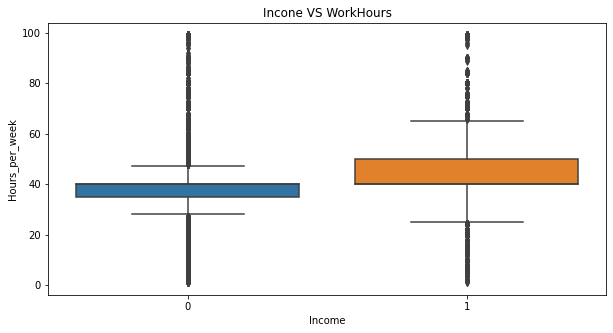

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Income'],y=df['Hours_per_week'])
plt.title('Incone VS WorkHours')

We can see that those who worked more tend to earn more. Average working hours of income earners above 50k is 45 compared to 38 for income earners below 50k

After having gained insights from the data we will do some preprocessing 

In [81]:
# Lets look at the correlation between the data
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


<AxesSubplot:>

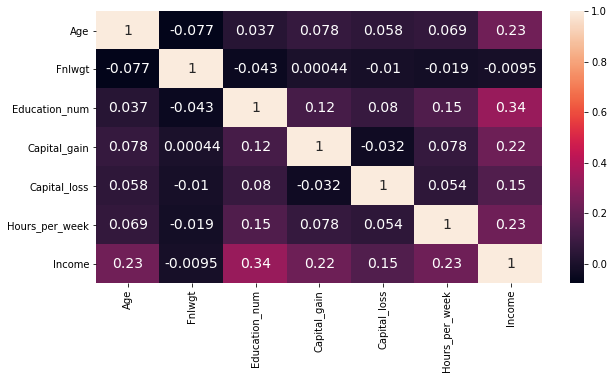

In [85]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,  annot_kws={"size":14})

In [86]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

Age: Number of unique values 73
________________________________________________
Workclass: Number of unique values 9
________________________________________________
Fnlwgt: Number of unique values 21647
________________________________________________
Education: Number of unique values 16
________________________________________________
Education_num: Number of unique values 16
________________________________________________
Marital_status: Number of unique values 7
________________________________________________
Occupation: Number of unique values 15
________________________________________________
Relationship: Number of unique values 6
________________________________________________
Race: Number of unique values 5
________________________________________________
Sex: Number of unique values 2
________________________________________________
Capital_gain: Number of unique values 119
________________________________________________
Capital_loss: Number of unique values 92
_______

We notice that there is a numerical column for Education, so we will drop the categorical column before tarining

In [6]:
# droppimg categorical column for education
df = df.drop('Education', axis=1)
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


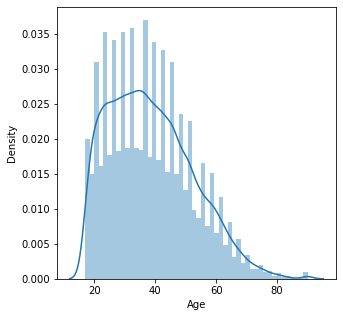

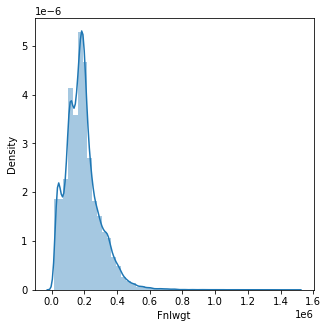

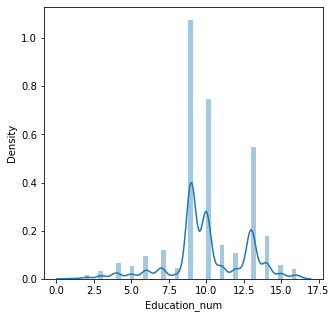

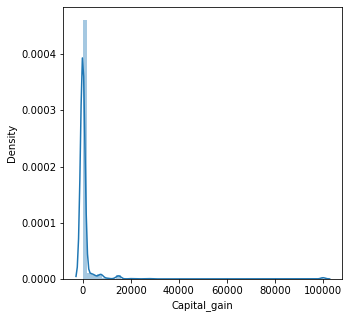

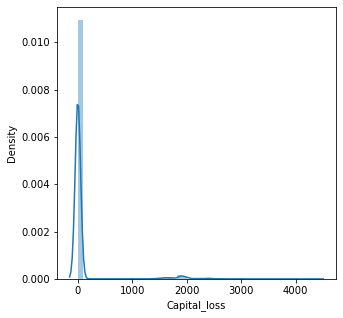

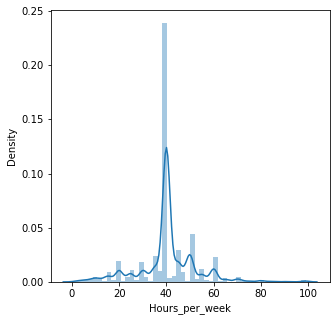

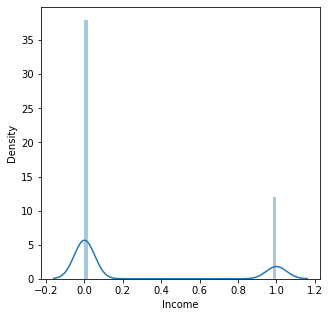

In [91]:
# let's check the distribution of the features
for column in df.columns:
    if df[column].dtype != object:
        plt.figure(figsize = (5,5))
        sns.distplot(df[column])

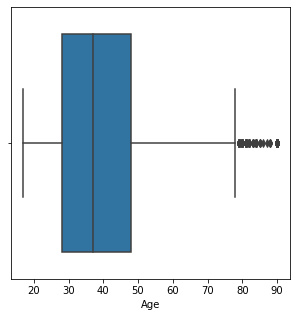

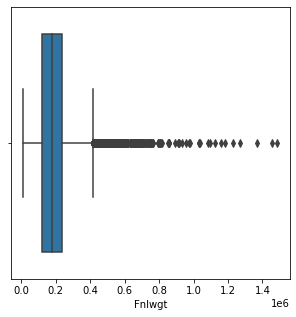

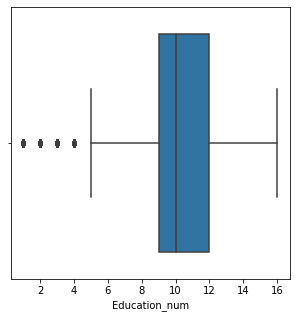

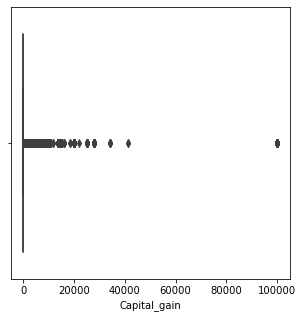

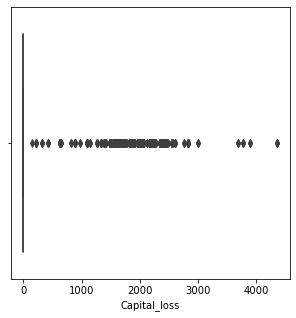

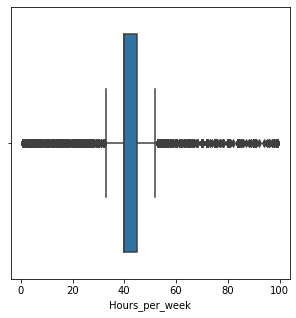

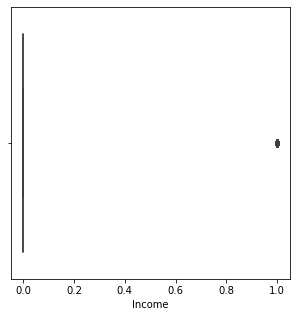

In [92]:
# let's check for outliers
for column in df.columns:
    if df[column].dtype != object:
        plt.figure(figsize = (5,5))
        sns.boxplot(df[column])

In [7]:
# Some of the Variables are categorical, we will do some encoding to make them numerical for better processing
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['Workclass',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [8]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [94]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


In [9]:
# Now we will split the data into testing and training sets
x = df.drop('Income', axis=1)
y = df.Income
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.356164,0.875,0.203824,0.533333,0.500000,0.285714,0.8,1.0,0.0,0.0,0.0,0.397959,0.95122
1,0.027397,0.500,0.367367,0.533333,0.166667,0.071429,1.0,1.0,0.0,0.0,0.0,0.244898,0.95122
2,0.452055,0.500,0.071977,0.400000,0.333333,0.500000,0.0,0.5,1.0,0.0,0.0,0.397959,0.95122
3,0.191781,0.500,0.090589,0.800000,0.333333,0.857143,0.0,1.0,1.0,0.0,0.0,0.602041,0.95122
4,0.328767,0.500,0.114332,0.600000,0.000000,0.571429,0.2,1.0,0.0,0.0,0.0,0.357143,0.95122


In [11]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

           feature        VIF
0              Age   3.667155
1        Workclass   8.374245
2           Fnlwgt   3.573771
3    Education_num  12.661918
4   Marital_status   3.946962
5       Occupation   3.726332
6     Relationship   2.611140
7             Race  17.118786
8              Sex   4.385981
9     Capital_gain   1.048267
10    Capital_loss   1.061248
11  Hours_per_week  11.442100
12  Native_country  18.773336


Some features show high multicolinearity but are true reflections so we will not be removing them

In [12]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [99]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8228764478764479
[1]K Nearest Neighbor Training Accuracy: 0.8744734994734995
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8156809406809407
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8465250965250966
[4]Ada Boost Training Accuracy: 0.8589856089856089
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


In [100]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[7012  404]
 [1317 1035]]
Model[0] Testing Accuracy = "0.8238124488124489 !"

[[6717  699]
 [1010 1342]]
Model[1] Testing Accuracy = "0.82504095004095 !"

[[7262  154]
 [1632  720]]
Model[2] Testing Accuracy = "0.8171580671580672 !"

[[7037  379]
 [1093 1259]]
Model[3] Testing Accuracy = "0.8493038493038493 !"

[[7019  397]
 [ 939 1413]]
Model[4] Testing Accuracy = "0.8632268632268633 !"

[[6483  933]
 [ 908 1444]]
Model[5] Testing Accuracy = "0.8115274365274365 !"

[[6947  469]
 [ 892 1460]]
Model[6] Testing Accuracy = "0.8606674856674856 !"



In [14]:
# Regularization Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 8}


In [16]:
rf = RandomForestClassifier(criterion='entropy',max_features='sqrt', n_estimators=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

85.03276003276004
85.07371007371007


In [103]:
# Regularization Logistic Regression
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'none'}


In [105]:
lr = LogisticRegression(penalty='none', intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

82.81122031122031
79.2414004914005


In [106]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 1}


In [107]:
ab = AdaBoostClassifier(learning_rate=1.0,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

85.1863226863227
85.02457002457004


In [108]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'random'}


In [109]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=9, splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

82.76003276003277
83.0036855036855


In [111]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,10)),
             'kernel':['rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}


In [22]:
from sklearn.svm import SVC
svc = SVC(gamma='auto', kernel='rbf', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

83.14905814905815
75.91830466830467


In [17]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':list(range(10)),
             'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}


In [19]:
knn = KNeighborsClassifier(n_neighbors=8,weights='uniform',algorithm='auto')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = knn.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

83.16953316953317
79.42874692874693


From the performance we can see that the  RandomForestClassifier performed best, we will save it for production

In [23]:
# saving the best model
import pickle
pickle.dump(rf, open('income.pkl','wb'))